In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
# Replace 'your_data.csv' with your file
df = pd.read_csv("Salary Data.csv")

# Quick look at the data
print(df.head())
print(df.info())


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary

In [4]:
# Option 1: Drop rows with any NaN
df_clean = df.dropna()

# Option 2: Fill NaN with mean (for numeric columns)
# df_clean = df.fillna(df.mean())

print("Data shape after handling NaN:", df_clean.shape)


Data shape after handling NaN: (373, 6)


In [5]:
# Assume 'Salary' is the target column
X = df_clean.drop('Salary', axis=1)  # features
y = df_clean['Salary']               # target


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (298, 5)
Testing data shape: (75, 5)


In [7]:
print("\nTarget mean values:")
print("Overall mean:", y.mean())
print("Training mean:", y_train.mean())
print("Testing mean:", y_test.mean())

print("\nTarget median values:")
print("Overall median:", y.median())
print("Training median:", y_train.median())
print("Testing median:", y_test.median())



Target mean values:
Overall mean: 100577.34584450402
Training mean: 100101.84563758389
Testing mean: 102466.66666666667

Target median values:
Overall median: 95000.0
Training median: 95000.0
Testing median: 100000.0


In [8]:
mean_diff = abs(y_train.mean() - y_test.mean())
mean_diff_percent = (mean_diff / y.mean()) * 100
print(f"\nMean difference between train and test: {mean_diff_percent:.2f}%")



Mean difference between train and test: 2.35%


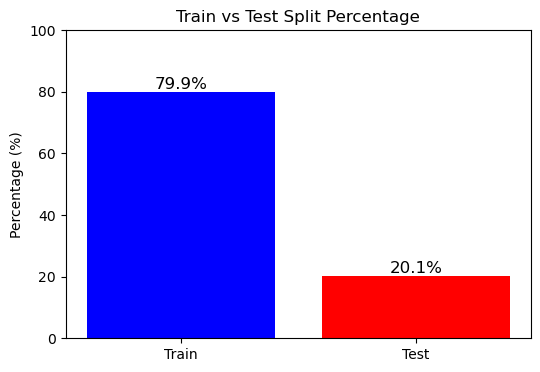

In [9]:
# Calculate sizes
train_size = len(X_train)
test_size = len(X_test)
total = train_size + test_size

percent_train = (train_size / total) * 100
percent_test = (test_size / total) * 100

# Bar chart
plt.figure(figsize=(6,4))
plt.bar(['Train', 'Test'], [percent_train, percent_test], color=['blue', 'red'])
plt.ylabel("Percentage (%)")
plt.title("Train vs Test Split Percentage")
plt.ylim(0, 100)

# Add percentage labels on top
plt.text(0, percent_train + 1, f"{percent_train:.1f}%", ha='center', fontsize=12)
plt.text(1, percent_test + 1, f"{percent_test:.1f}%", ha='center', fontsize=12)

plt.show()
